In [4]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('D:/major project items/dataset1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



D:/major project items/dataset1\train\Bacterial_spot\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG
D:/major project items/dataset1\train\Bacterial_spot\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG
D:/major project items/dataset1\train\Bacterial_spot\00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG
D:/major project items/dataset1\train\Bacterial_spot\00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG
D:/major project items/dataset1\train\Bacterial_spot\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG
D:/major project items/dataset1\train\Bacterial_spot\00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG
D:/major project items/dataset1\train\Bacterial_spot\01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG
D:/major project items/dataset1\train\Bacterial_spot\01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG
D:/major project items/dataset1\train\Bacterial_spot\01a46cb5-d354-4f59-868

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization,MaxPool2D
from tensorflow.keras.preprocessing.image import load_img
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing.image import img_to_array

Training Data Set

In [7]:
DATASET="D:/major project items/Detection-of-Disease-on-Plants-using-Transfer-Learning-Methods/tomato_field/Train"

CATEGORIES=["Bacterial_spot","Early_blight","healthy","Late_blight","Leaf_Mold","Septoria_leaf_spot","Spider_mite","Target_Spot","Mosaic_virus","Yellow_Leaf_Curl_Virus"]
#ten types of leaf diseases       
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=450):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))            
            train_data.append([img,label])

Test Data

In [9]:
test_data=[]
DATASET2="D:/major project items/Detection-of-Disease-on-Plants-using-Transfer-Learning-Methods/tomato_field/Test"
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))
            test_data.append([img,label])
            
print(len(train_data)) # size of train dataset
print(len(test_data))  # size of validation dataset

4500
1000


In [10]:
print(f"The shape of the Training Data:\n")
train_data[0][0].shape

The shape of the Training Data:



(128, 128, 3)

Validation Data

In [11]:
val_data=[]
DATASET2="D:/major project items/Detection-of-Disease-on-Plants-using-Transfer-Learning-Methods/tomato_field/Val"
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))
            val_data.append([img,label])
            
print(len(train_data)) # size of train dataset
print(len(test_data))
print(len(val_data))# size of validation dataset

4500
1000
1000


Performing Train_Test_Val splitting

In [12]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

    
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [13]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train),len(y_train)

(4500, 4500)

In [14]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test),len(y_test)

(1000, 1000)

In [15]:
X_val=[]
y_val=[]

for features,label in val_data:
    X_val.append(features)
    y_val.append(label)
    
Z=[]
for i in y_val:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_val),len(y_val)

(1000, 1000)

In [16]:
X_train=np.array(X_train).reshape(-1,128,128,3)
X_train=X_train/255.0
print(X_train.shape)

X_test=np.array(X_test).reshape(-1,128,128,3)
X_test=X_test/255.0
print(X_test.shape)

X_val=np.array(X_val).reshape(-1,128,128,3)
X_val=X_val/255.0
print(X_val.shape)


(4500, 128, 128, 3)
(1000, 128, 128, 3)
(1000, 128, 128, 3)


One hot Encoding the labels of Train, Test, Val

In [17]:
y_train=to_categorical(y_train)


y_test=to_categorical(y_test)
y_val = to_categorical(y_val)

Creating VGG19 MODEL

In [18]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

In [19]:
AlexNet_model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
AlexNet_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

AlexNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                        

In [20]:
import tensorflow as tf
tf.keras.utils.plot_model(AlexNet_model, show_shapes=True, dpi=48)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
X_train[0].shape

(128, 128, 3)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

model_checkpoint = ModelCheckpoint(
    filepath="AlexNet_model_on_tomato.h5",
    verbose=3,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stopping= EarlyStopping(monitor="val_loss",patience=4,verbose=3,mode="min")

reducelrplateau= ReduceLROnPlateau(monitor='val_loss', factor=0.2,verbose=3,patience=2,mode="min", min_lr=0.0001)


hist=AlexNet_model.fit(X_train,y_train,epochs=70,batch_size=128,validation_split=0.2,callbacks= [model_checkpoint,reducelrplateau])

Epoch 1/70
29/29 [==============================] - ETA: 0s - loss: 2.6295 - accuracy: 0.2081 
Epoch 1: val_accuracy improved from -inf to 0.09556, saving model to AlexNet_model_on_tomato.h5
29/29 [==============================] - 465s 16s/step - loss: 2.6295 - accuracy: 0.2081 - val_loss: 2.5482 - val_accuracy: 0.0956 - lr: 0.0010
Epoch 2/70
29/29 [==============================] - ETA: 0s - loss: 1.9196 - accuracy: 0.3097 
Epoch 2: val_accuracy did not improve from 0.09556
29/29 [==============================] - 433s 15s/step - loss: 1.9196 - accuracy: 0.3097 - val_loss: 2.8506 - val_accuracy: 0.0789 - lr: 0.0010
Epoch 3/70
29/29 [==============================] - ETA: 0s - loss: 1.7617 - accuracy: 0.3911 
Epoch 3: val_accuracy improved from 0.09556 to 0.13222, saving model to AlexNet_model_on_tomato.h5

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
29/29 [==============================] - 459s 16s/step - loss: 1.7617 - accuracy: 0.3911 - val_loss: 3.

In [133]:
AlexNet_model.load_weights('./AlexNet_model_on_tomato.h5')

In [134]:
test_loss,test_acc=AlexNet_model.evaluate(X_test,y_test)
test_loss,test_acc

32/32 [==============================] - 5s 143ms/step - loss: 0.8365 - accuracy: 0.8500


(0.8364881873130798, 0.8500000238418579)

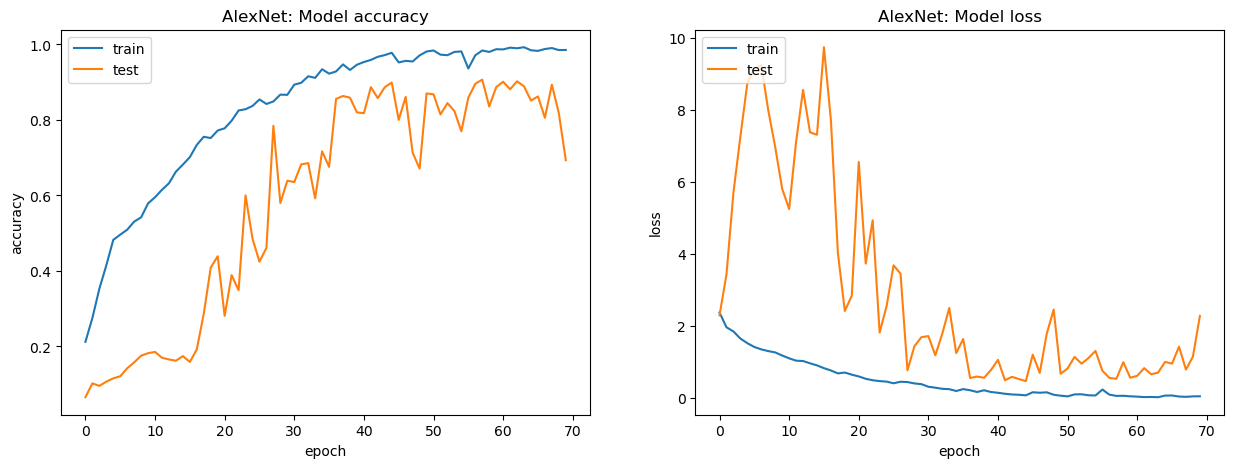

In [135]:
# Plot the accuracy and loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('AlexNet: Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('AlexNet: Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [136]:
y_pred=AlexNet_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)



32/32 [==============================] - 5s 143ms/step


In [137]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay


In [138]:
import sklearn
print(sklearn.__version__)


1.2.1


In [139]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [140]:
y_test= np.argmax(y_test,axis=-1)

In [141]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[91,  2,  0,  1,  0,  0,  0,  0,  0,  6],
       [ 6, 56,  2, 10,  2, 10,  2,  8,  0,  4],
       [ 0,  0, 93,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  6,  0, 81,  7,  5,  1,  0,  0,  0],
       [ 0,  6,  0,  0, 82, 12,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  5, 86,  1,  2,  5,  0],
       [ 0,  1,  0,  0,  1,  3, 79, 14,  2,  0],
       [ 0,  3,  2,  0,  1,  1,  3, 86,  4,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 99,  0],
       [ 1,  0,  0,  0,  1,  1,  0,  0,  0, 97]], dtype=int64)

In [142]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='AlexNet:Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="right",
                 color="White" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


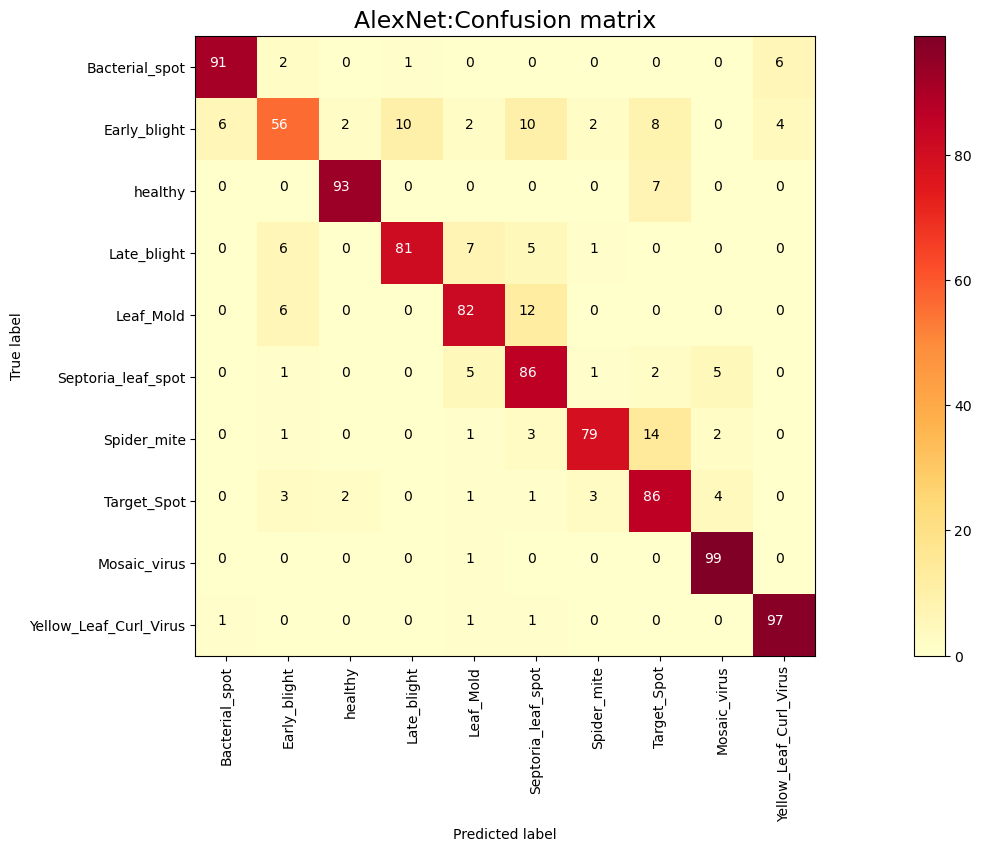

In [143]:
import itertools
plt.figure(figsize=(20,7))
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=CATEGORIES)
plt.xticks(rotation=90)
plt.savefig("AlexNet confusion_matrix.jpg")

In [144]:
from sklearn.metrics import classification_report
print("AlexNet: Classification Report\n\n")
print(classification_report(y_test,y_pred,target_names=CATEGORIES))

AlexNet: Classification Report


                        precision    recall  f1-score   support

        Bacterial_spot       0.93      0.91      0.92       100
          Early_blight       0.75      0.56      0.64       100
               healthy       0.96      0.93      0.94       100
           Late_blight       0.88      0.81      0.84       100
             Leaf_Mold       0.82      0.82      0.82       100
    Septoria_leaf_spot       0.73      0.86      0.79       100
           Spider_mite       0.92      0.79      0.85       100
           Target_Spot       0.74      0.86      0.79       100
          Mosaic_virus       0.90      0.99      0.94       100
Yellow_Leaf_Curl_Virus       0.91      0.97      0.94       100

              accuracy                           0.85      1000
             macro avg       0.85      0.85      0.85      1000
          weighted avg       0.85      0.85      0.85      1000



In [145]:
y_test[23]

7

1/1 [==============================] - 0s 94ms/step


array([7], dtype=int64)

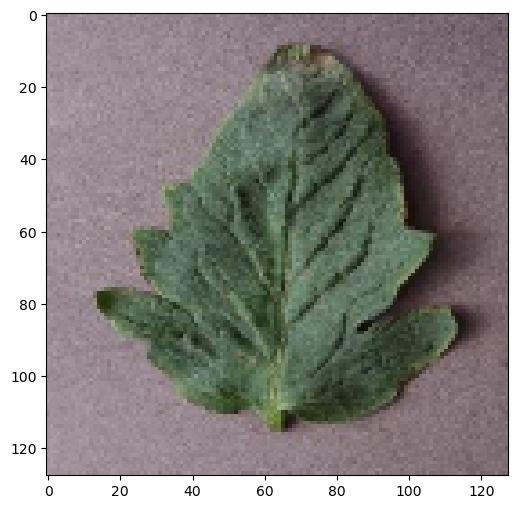

In [146]:
sample_pred=AlexNet_model.predict(np.array(X_test[23]).reshape(-1,128,128,3))
sample_pred = np.argmax(sample_pred, axis=-1)
plt.imshow(X_test[23])
sample_pred

In [147]:
lis=[]
for image,true,pred in zip(X_test,y_test,y_pred):
    lis.append([image,true,pred])
    

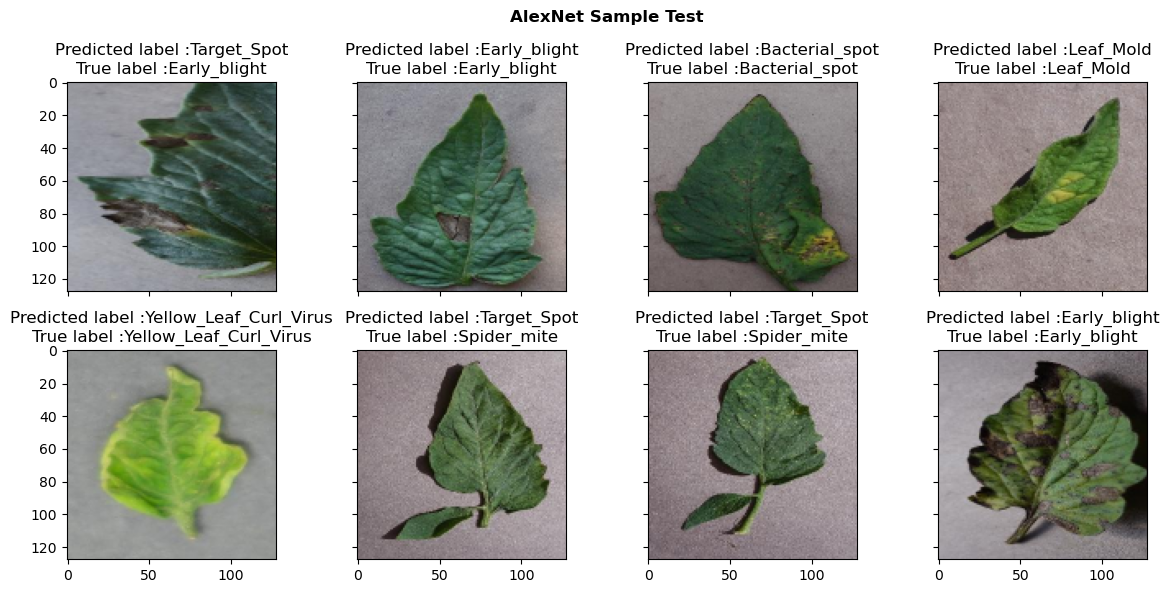

<Figure size 1300x600 with 0 Axes>

In [149]:
#Monitoring the model_performance with its predictions and labels
plt.rcParams["figure.figsize"] = (13,6)
n = 0
nrows = 2
ncols = 4

fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
fig.suptitle("AlexNet Sample Test",fontweight ="bold")
for row in range(nrows):
    for col in range(ncols):

        test_image,true_label,pred_label = random.choice(lis) 
        
        ax[row,col].imshow(test_image)

        pred_label = pred_label
        ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(CATEGORIES[pred_label],CATEGORIES[true_label]))
        n += 1
        plt.tight_layout()
plt.show()
plt.savefig("AlexNet Sample Test.jpeg")


141/141 [==============================] - 21s 151ms/step
Confusion matrix, without normalization


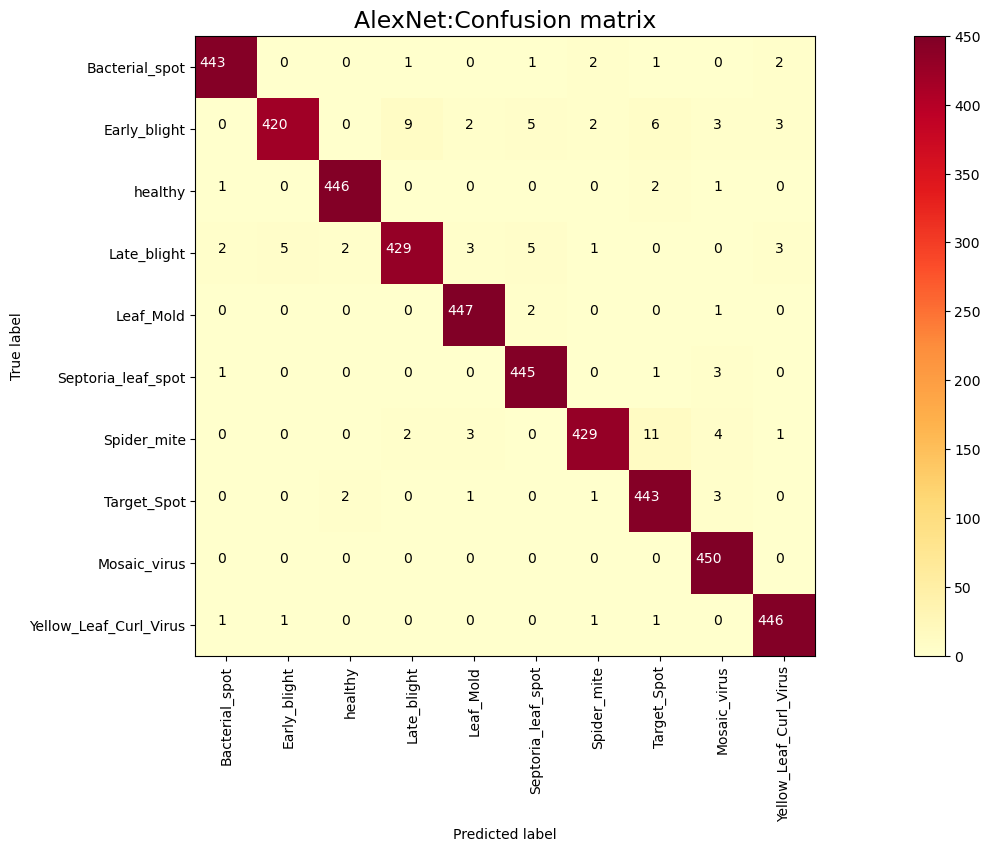

In [150]:
train_acc= AlexNet_model.predict(X_train)
train_pred=np.argmax(train_acc,axis=-1)
train_test= np.argmax(y_train,axis=-1)

#plot Confusion matrix
import itertools
plt.figure(figsize=(20,7))
cm_train = confusion_matrix(train_test,train_pred)
plot_confusion_matrix(cm_train, classes=CATEGORIES)
plt.xticks(rotation=90)
plt.savefig("AlexNet : Train Confusion_matrix.jpg")

In [151]:
from sklearn.metrics import classification_report
print("AlexNet: TEST Classification Report\n\n")
print(classification_report(train_test,train_pred,target_names=CATEGORIES))

AlexNet: TEST Classification Report


                        precision    recall  f1-score   support

        Bacterial_spot       0.99      0.98      0.99       450
          Early_blight       0.99      0.93      0.96       450
               healthy       0.99      0.99      0.99       450
           Late_blight       0.97      0.95      0.96       450
             Leaf_Mold       0.98      0.99      0.99       450
    Septoria_leaf_spot       0.97      0.99      0.98       450
           Spider_mite       0.98      0.95      0.97       450
           Target_Spot       0.95      0.98      0.97       450
          Mosaic_virus       0.97      1.00      0.98       450
Yellow_Leaf_Curl_Virus       0.98      0.99      0.99       450

              accuracy                           0.98      4500
             macro avg       0.98      0.98      0.98      4500
          weighted avg       0.98      0.98      0.98      4500



In [152]:
train_loss,train_acc=AlexNet_model.evaluate(X_train,y_train)
print("\n\nAlexNet Accuracy\n")
train_loss,train_acc

141/141 [==============================] - 22s 155ms/step - loss: 0.1218 - accuracy: 0.9773


AlexNet Accuracy



(0.12175638973712921, 0.9773333072662354)

In [25]:
final_val_accuracy = hist.history['val_accuracy'][-1]
print(f'Final Validation Accuracy: {final_val_accuracy}')

Final Validation Accuracy: 0.9300000071525574


In [1]:
model.save("AlexNet_model.h5")

NameError: name 'model' is not defined